In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-brazil/brazil_covid19_cities.csv
/kaggle/input/corona-virus-brazil/brazil_cities_coordinates.csv
/kaggle/input/corona-virus-brazil/brazil_covid19_macro.csv
/kaggle/input/corona-virus-brazil/brazil_covid19_old.csv
/kaggle/input/corona-virus-brazil/brazil_population_2019.csv
/kaggle/input/corona-virus-brazil/brazil_covid19.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/corona-virus-brazil/brazil_cities_coordinates.csv')
df.head()

,state_code,city_code,city_name,lat,long,capital
0,52,5200050,Abadia de Goiás,-16.75730,-49.4412,False
1,31,3100104,Abadia dos Dourados,-18.48310,-47.3916,False
2,52,5200100,Abadiânia,-16.19700,-48.7057,False
3,31,3100203,Abaeté,-19.15510,-45.4444,False
4,15,1500107,Abaetetuba,-1.72183,-48.8788,False


In [5]:
df.columns

Index(['state_code', 'city_code', 'city_name', 'lat', 'long', 'capital'], dtype='object')

In [6]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_code  5570 non-null   int64  
 1   city_code   5570 non-null   int64  
 2   city_name   5570 non-null   object 
 3   lat         5570 non-null   float64
 4   long        5570 non-null   float64
 5   capital     5570 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(1)
memory usage: 223.1+ KB
None


In [7]:
# Check missing values
print(df.isnull().sum())

state_code    0
city_code     0
city_name     0
lat           0
long          0
capital       0
dtype: int64


In [8]:
# Summary stats
print(df.describe())

        state_code     city_code          lat         long
count  5570.000000  5.570000e+03  5570.000000  5570.000000
mean     32.377738  3.253591e+06   -16.449144   -46.231003
std       9.833862  9.849103e+05     8.287237     6.408539
min      11.000000  1.100015e+06   -33.686600   -72.899700
25%      25.000000  2.512126e+06   -22.843875   -50.878525
50%      31.000000  3.146280e+06   -18.094300   -46.523200
75%      41.000000  4.119190e+06    -8.496445   -41.410775
max      53.000000  5.300108e+06     4.603140   -32.410700


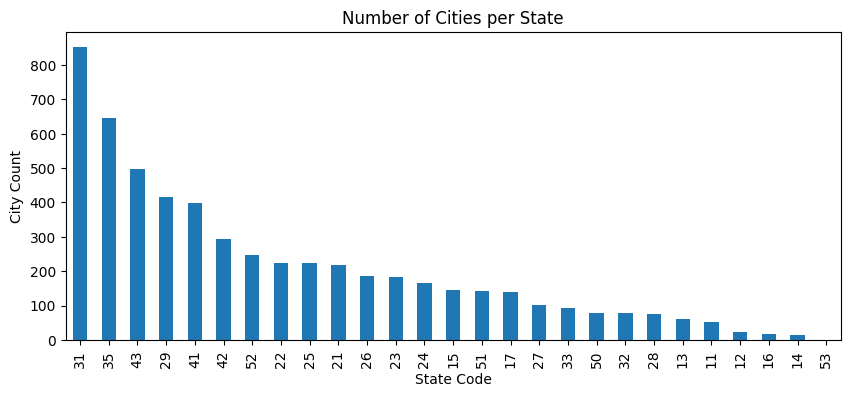

In [9]:
# Count of cities per state
plt.figure(figsize=(10,4))
df['state_code'].value_counts().plot(kind='bar')
plt.title('Number of Cities per State')
plt.xlabel('State Code')
plt.ylabel('City Count')
plt.show()

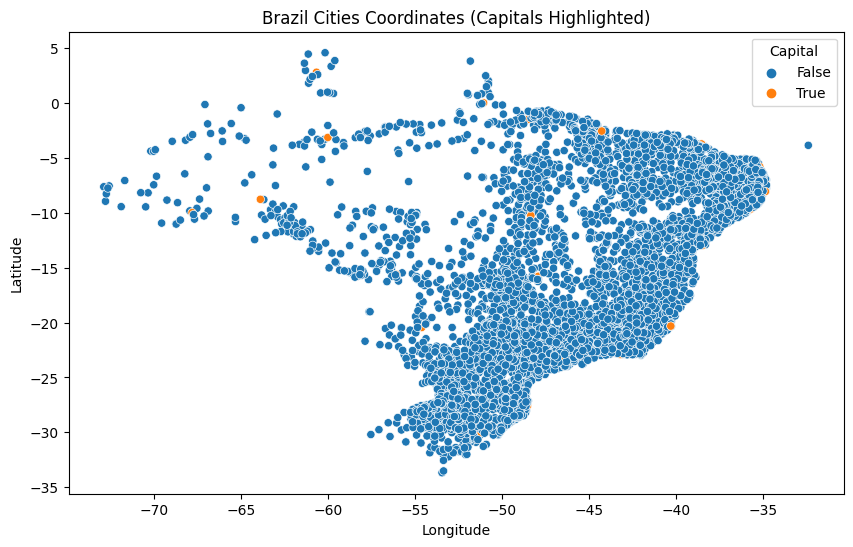

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='capital', data=df)
plt.title('Brazil Cities Coordinates (Capitals Highlighted)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Capital')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Select features & target
X = df[['lat', 'long']]
y = df['capital']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Predictions
y_pred = model.predict(X_test)

# Performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1112
        True       0.00      0.00      0.00         2

    accuracy                           1.00      1114
   macro avg       0.50      0.50      0.50      1114
weighted avg       1.00      1.00      1.00      1114



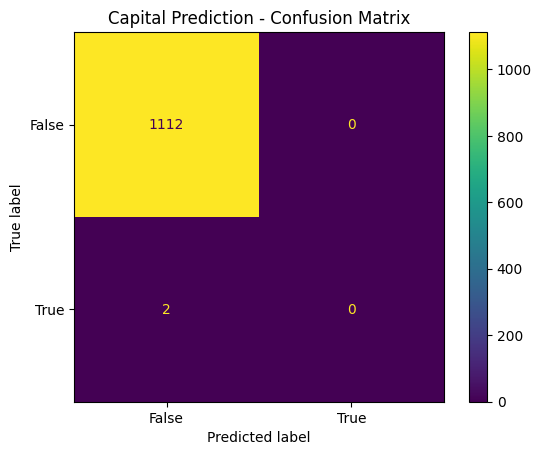

In [15]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Capital Prediction - Confusion Matrix")
plt.show()